### 5) Implement any 2 Clustering techniques using any data analytics tool.

#### K-Means Clustering :
    Perform clustering for the crime data and identify the number of clusters formed and draw inferences. Refer to 
    crime_data.csv dataset.

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                #for Mathematical calculations
import seaborn as sns             #for Advanced visualizations

crime = pd.read_csv("crime_data.csv")

In [25]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
# We see the columns in the dataset
crime['State'] = crime.iloc[:,0]
crime = crime.iloc[:, [5,1,2,3,4]]

In [27]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
# As a part of the Data cleansing we check the data for any missing/ na values
crime.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [29]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
crime1 = crime.duplicated()
sum(crime1)

0

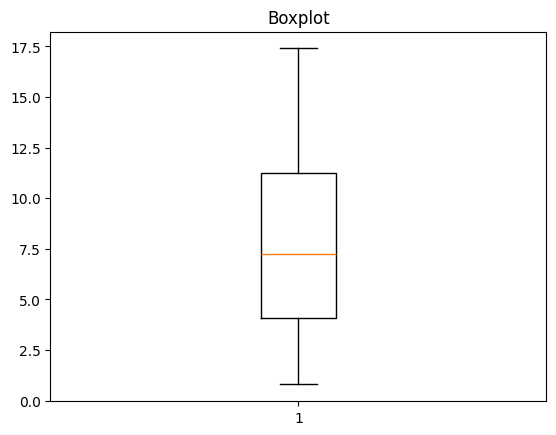

In [30]:
# We now plot the boxplot for the data using each feature independently and check for Outliers
plt.boxplot(crime.Murder);plt.title('Boxplot');plt.show()

# We see that there are Outliers present for "Balance" Feature

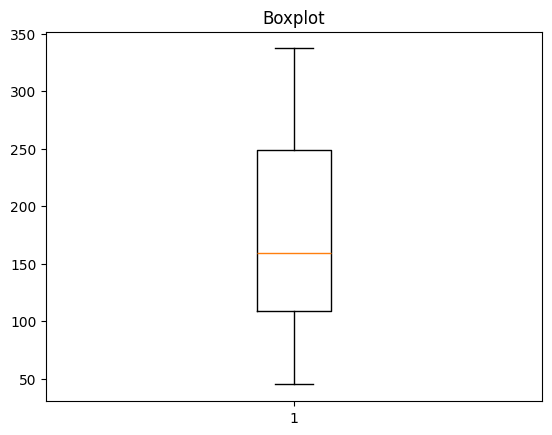

In [31]:
plt.boxplot(crime.Assault);plt.title('Boxplot');plt.show()  # outliers present

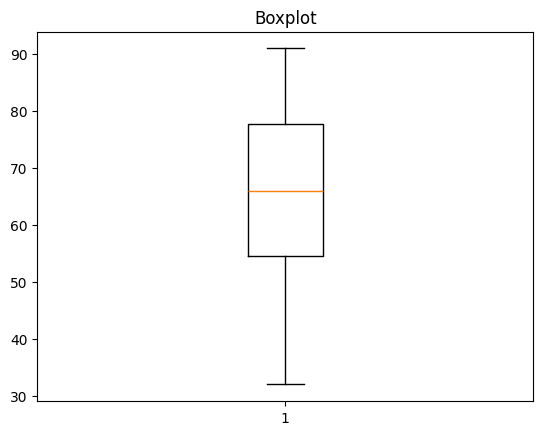

In [32]:
plt.boxplot(crime.UrbanPop);plt.title('Boxplot');plt.show()  # No outliers 

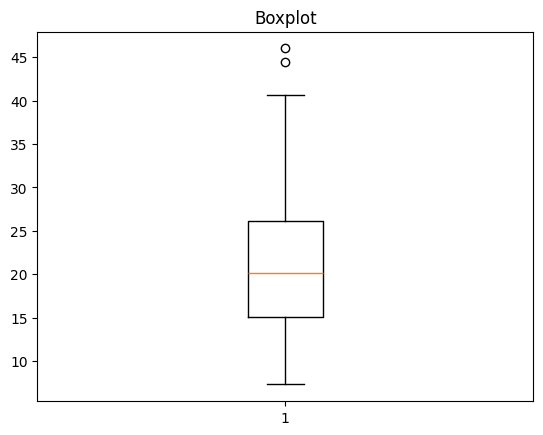

In [33]:
plt.boxplot(crime.Rape);plt.title('Boxplot');plt.show()  # outliers present

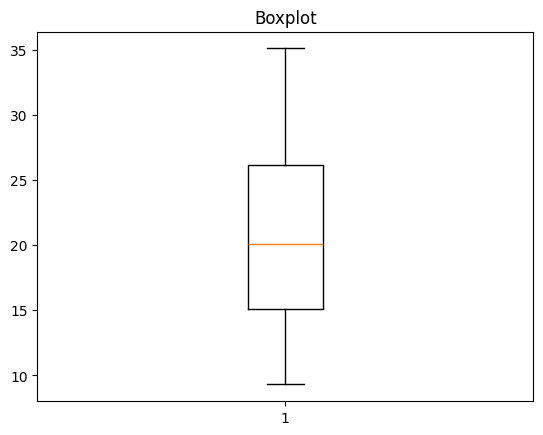

In [34]:
from scipy.stats.mstats import winsorize

crime['Rape'] = winsorize(crime.Rape, limits=[0.07, 0.093])   
plt.boxplot(crime['Rape']);plt.title('Boxplot');plt.show()


In [35]:
# Now we check the data for zero variance values
(crime == 0).all()

State       False
Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [36]:
# We see the data again now to check whether the data is in scale
crime.describe

# we notice that the data needs to be normalise, using normalization

<bound method NDFrame.describe of              State  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  35.1
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  35.1
5         Colorado     7.9      204        78  35.1
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4    

In [37]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

(array([9., 2., 9., 4., 7., 3., 5., 3., 3., 5.]),
 array([ 9.3 , 11.88, 14.46, 17.04, 19.62, 22.2 , 24.78, 27.36, 29.94,
        32.52, 35.1 ]),
 <BarContainer object of 10 artists>)

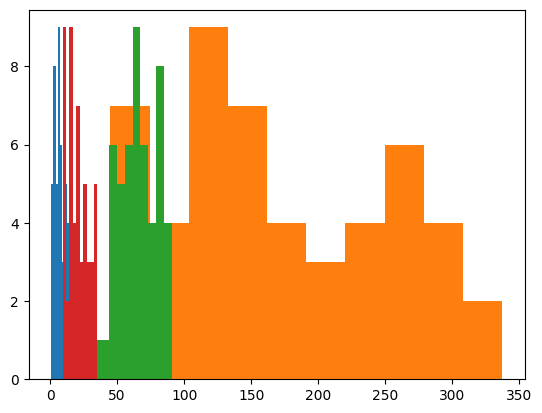

In [38]:
##########################Univariate, Bivariate################
plt.hist(crime["Murder"])   #Univariate

plt.hist(crime["Assault"])

plt.hist(crime["UrbanPop"])

plt.hist(crime["Rape"])


In [39]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[7.35837649853608,
 5.532071995078604,
 4.040767895223881,
 3.5209233078921667,
 3.1287099563270795,
 2.9120528638035763]

Text(0, 0.5, 'total_within_SS')

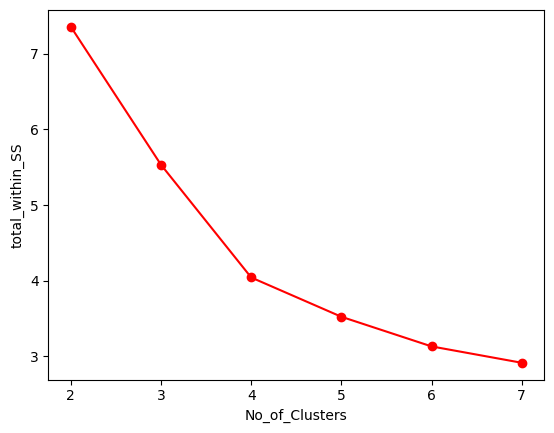

In [40]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [42]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [43]:
model.labels_ # getting the labels of clusters assigned to each row

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0])

In [44]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [45]:
crime['clust'] = mb # creating a  new column and assigning it to new column 

In [46]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,35.1,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,35.1,2


In [47]:
crime = crime.iloc[:,[5,0,1,2,3,4]]
crime.head()

,clust,State,Murder,Assault,UrbanPop,Rape
0,3,Alabama,13.2,236,58,21.2
1,2,Alaska,10.0,263,48,35.1
2,2,Arizona,8.1,294,80,31.0
3,3,Arkansas,8.8,190,50,19.5
4,2,California,9.0,276,91,35.1


In [48]:
# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters

In [65]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 4 nos of clear cluster formed
crime.iloc[:, 2:7].groupby(crime.clust).mean()


,Murder,Assault,UrbanPop,Rape,column_name
clust,,,,,
0,5.656250,138.875000,73.875000,18.843750,0.0
1,3.600000,78.538462,52.076923,12.446154,1.0
2,10.815385,257.384615,76.000000,30.930769,2.0
3,13.937500,243.625000,53.750000,21.412500,3.0


We can now clearly see the 4 number of clusters formed, which can be described as under

 1. Cluster3, "2" = Defines the group of states that are high on crime in either if the categories described and need immediate action on high alert.
                      
 2. Cluster2, "1" = Defines the group of states that have comparatively high crime rate and would require action as well
   
 3. Cluster4, "3" = Defines the group of states that are medium on crime rate while the Urbanpop i on high and need action on a alert side
                      
 4. Cluster1, "0" = Defines the group of state that are low on crime rate and would require lesser of an action to be taken, but of course not to be neglected at any cost.

##### Hierarchical Clustering :
    Perform clustering for the crime data and identify the number of clusters formed and draw inferences. Refer to 
    crime_data.csv dataset.

In [73]:

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

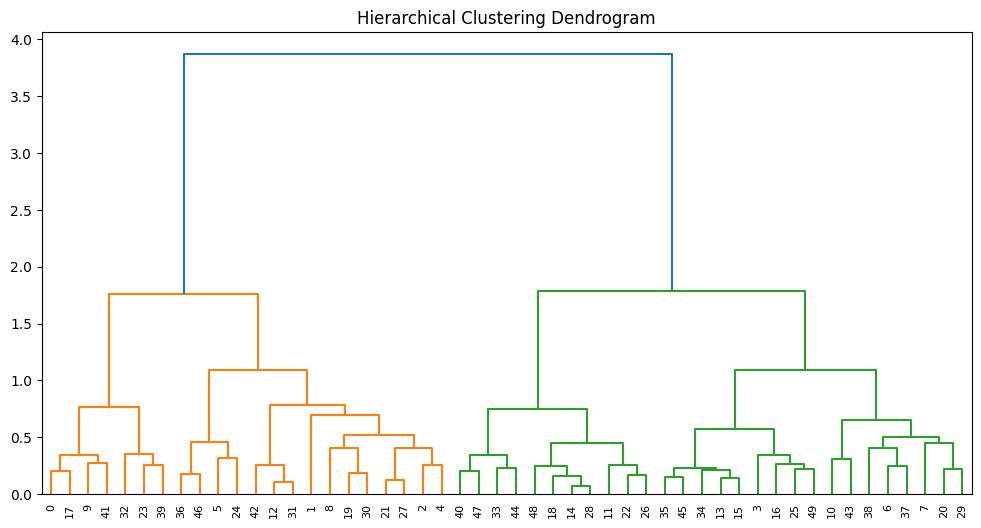

In [74]:
linkage_matrix = linkage(df_norm, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [76]:
# Now apply AgglomerativeClustering, and choose 3 clusters based the above dendrogram
from sklearn.cluster import AgglomerativeClustering

In [78]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
cluster_labels = pd.Series(h_complete.labels_)
crime1['clust'] = cluster_labels # create a new column and assign the cluster labels to the new column
crime1['clust']

0     1
1     1
2     2
3     0
4     2
5     2
6     0
7     0
8     2
9     1
10    0
11    0
12    2
13    0
14    0
15    0
16    0
17    1
18    0
19    2
20    0
21    2
22    0
23    1
24    0
25    0
26    0
27    2
28    0
29    0
30    2
31    2
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    1
40    0
41    1
42    2
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [89]:
# Aggregate mean of each cluster
crime.iloc[:, 1:].groupby(crime1.clust).mean()

,Murder,Assault,UrbanPop,Rape,hierarchical_cluster
0,5.003226,116.483871,63.838710,16.338710,1.258065
1,14.087500,252.750000,53.500000,24.537500,2.625000
2,11.054545,264.090909,79.090909,32.618182,0.000000
